In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import ease

In [2]:
def avg_capacity(vote):
    import pandas as pd
    average_plant_capacity = pd.read_csv('../Arranged_Data/average_plant_capacity.csv')
    avg_cap_list = []
    coal_sum = 0
    ng_sum = 0
    petro_sum = 0
    hydro_sum = 0
    solar_sum = 0
    wind_sum =0
    for i in vote.keys():
        coal_sum += int(average_plant_capacity.Coal[average_plant_capacity.State == i]) * vote[i]
        ng_sum += int(average_plant_capacity.NG[average_plant_capacity.State == i]) * vote[i]
        petro_sum += int(average_plant_capacity.Petro[average_plant_capacity.State == i]) * vote[i]
        hydro_sum += int(average_plant_capacity.Hydro[average_plant_capacity.State == i]) * vote[i]
        solar_sum += int(average_plant_capacity.Solar[average_plant_capacity.State == i]) * vote[i]
        wind_sum += int(average_plant_capacity.Wind[average_plant_capacity.State == i]) * vote[i]
    return([coal_sum, ng_sum, petro_sum, hydro_sum, solar_sum, wind_sum])

In [3]:
cap_pop = pd.read_csv('../Arranged_Data/average_plant_capacity.csv')
cap_pop[cap_pop.Coal != 0].Coal.mean()

2878153.5744680851

In [4]:
def possible_type(avg_cap_list):
    import pandas as pd
    from scipy import stats
    cap_pop = pd.read_csv('../Arranged_Data/average_plant_capacity.csv')
    e_type = ['Coal', 'NG', 'Petro', 'Hydro', 'Solar', 'Wind']
    possible_type_list = []
    for i in range(len(e_type)):
        p_value = stats.ttest_1samp(cap_pop[cap_pop[e_type[i]] != 0][e_type[i]], avg_cap_list[i])[1]
        alpha = 0.05  #confidence
        if avg_cap_list[i] < cap_pop[cap_pop[e_type[i]] !=0][e_type[i]].mean():
            if p_value < alpha:
                pass
            else:
                p_value = -(1 - p_value)
                possible_type_list.append([p_value, avg_cap_list[i], e_type[i]])
        else:
            p_value = (1 - p_value)
            possible_type_list.append([p_value, avg_cap_list[i], e_type[i]])
    return possible_type_list

In [5]:
possible_type([3427272.05, 601160.0700000001, 132529.37000000002, 159063.21, 2253.23, 149414.79999999996])

[[0.95810457341493549, 3427272.05, 'Coal'],
 [-0.8923811497455455, 601160.0700000001, 'NG'],
 [0.99926594657247059, 132529.37000000002, 'Petro'],
 [-0.90421357886564524, 159063.21, 'Hydro'],
 [-0.83811357367028649, 149414.79999999996, 'Wind']]

In [6]:
ease.rf(2, 75, 30, 1.5)

{'DE': 0.01,
 'GA': 0.02,
 'IL': 0.02,
 'IN': 0.02,
 'KY': 0.14,
 'MD': 0.02,
 'MO': 0.04,
 'NC': 0.01,
 'NH': 0.01,
 'NJ': 0.2,
 'OH': 0.02,
 'OR': 0.01,
 'VA': 0.05,
 'VT': 0.01,
 'WV': 0.42}

In [7]:
a = ease.avg_capacity(ease.rf(2, 75, 30, 1.5))

In [11]:
b = ease.possible_type(a)

In [27]:
def rev_plot(avg_cost, capacity, e_type):
    import pandas as pd
    import matplotlib.pyplot as plt
    
    esales = pd.read_csv('../Arranged_Data/Cost/Sale_CO2_tax.csv', skiprows= 1, names = ['Year', 'Sale', 'CO2_tax'])
    if e_type == 'conventional':
        revenue = (esales.Sale - esales.CO2_tax - avg_cost) * capacity * 365 * 24 / 1e6
    elif e_type == 'clean':
        revenue = (esales.Sale - avg_cost) * capacity * 365 * 24 / 1e6
    plt.plot(np.arange(2018, 2051), revenue[3:])
    plt.xlabel('Year')
    plt.ylabel('Money Save (million dollars / year)')
    plt.grid()
    return plt

<module 'matplotlib.pyplot' from '/Users/taiyupan/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

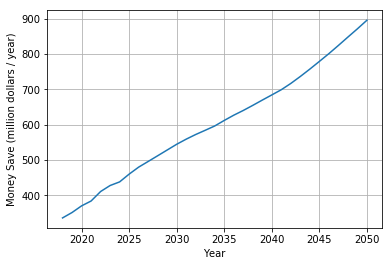

In [28]:
rev_plot(30, 500, 'clean')

In [23]:
np.array(b)[:, 2]

array(['Coal', 'NG', 'Petro', 'Hydro', 'Wind'], 
      dtype='<U32')

In [32]:
def avg_cost(vote):
    import pandas as pd
    cost = pd.read_csv('../Arranged_Data/Cost/df_cost.csv')
    coal_sum = 0
    ng_sum = 0
    petro_sum = 0
    hydro_sum = 0
    solar_sum = 0
    wind_sum =0
    for i in vote.keys():
        coal_sum += int(cost.Coal[cost.State == i]) * vote[i]
        ng_sum += int(cost.NG[cost.State == i]) * vote[i]
        petro_sum += int(cost.Petro[cost.State == i]) * vote[i]
        hydro_sum += int(cost.Hydro[cost.State == i]) * vote[i]
        solar_sum += int(cost.solar[cost.State == i]) * vote[i]
        wind_sum += int(cost.WindCost[cost.State == i]) * vote[i]
    avg_cost_dict = {'Coal':coal_sum, 'NG':ng_sum, 'Petro':petro_sum, 'Hydro':hydro_sum, 'Solar':solar_sum, 'Wind':wind_sum}
    return avg_cost_dict

In [33]:
avg_cost(ease.rf(2, 75, 30, 1.5))

{'Coal': 79.02000000000001,
 'Hydro': 8.000000000000002,
 'NG': 98.57,
 'Petro': 114.07000000000001,
 'Solar': 23.47,
 'Wind': 37.02}

In [ ]:
def suggest(prec, ts, tw, ws, capacity):
    state_vote = rf(prec, ts, tw, ws)
    cap = avg_capacity(state_vote)
    cost = avg_cost(state_vote)
    source_list = possible_type(avg_cap_list)